In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
fish_data = pd.read_csv("fish.csv")
fish_data

,CPUE,averageWeight,gear,gearCount,quartileCount,quartileWeight,species,survey_ID,survey_date,totalCatch,totalWeight
0,17.00,1.68,Standard gill nets,1.0,2.0-10.8,1.7-3.1,NOP,117310,1995-08-10,17,12943.00
1,20.20,0.12,Standard trap nets,5.0,3.5-57.1,0.1-0.3,BLG,117310,1995-08-10,101,5553.00
2,1.20,0.12,Standard trap nets,5.0,0.4-2.8,0.1-0.2,YEP,117310,1995-08-10,6,328.00
3,8.80,0.05,Standard trap nets,5.0,0.2-0.8,0.3-1.5,LMB,117310,1995-08-10,44,990.00
4,2.00,0.19,Standard trap nets,5.0,2.1-24.1,0.2-0.4,BLC,117310,1995-08-10,10,850.00
...,...,...,...,...,...,...,...,...,...,...,...
237,4.00,3.30,Standard gill nets,2.0,0.8-4.3,1.0-4.0,CAP,117300,1992-07-20,8,26.37
238,0.50,1.03,Standard trap nets,4.0,NaN,NaN,CCF,117300,1992-07-20,2,2.06
239,1.50,0.08,Standard trap nets,4.0,0.7-6.5,0.1-0.2,PMK,117300,1992-07-20,6,0.50
240,3.25,2.56,Standard trap nets,4.0,0.4-2.4,1.8-5.1,CAP,117300,1992-07-20,13,33.31


In [3]:
northern = fish_data.loc[(fish_data["species"] == "NOP") & (fish_data["gear"] == "Standard gill nets")]
northern = northern.sort_values(by="survey_date")
northern.head()

,CPUE,averageWeight,gear,gearCount,quartileCount,quartileWeight,species,survey_ID,survey_date,totalCatch,totalWeight
161,2.83,4.48,Standard gill nets,6.0,2.0-10.8,1.7-3.1,NOP,117289,1983-07-20,17,76.12
94,1.00,0.67,Standard gill nets,3.0,2.0-10.8,1.7-3.1,NOP,117292,1986-07-16,3,2.00
196,22.00,0.42,Standard gill nets,4.0,2.0-10.8,1.7-3.1,NOP,117297,1991-07-15,88,36.62
225,4.00,2.66,Standard gill nets,2.0,2.0-10.8,1.7-3.1,NOP,117300,1992-07-20,8,21.31
40,8.00,1.71,Standard gill nets,1.0,2.0-10.8,1.7-3.1,NOP,117309,1994-08-25,8,6210.00


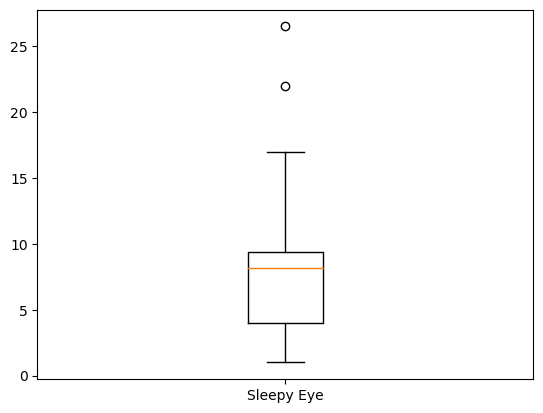

In [9]:
plt.boxplot(northern["CPUE"])
labels = ["Sleepy Eye"]
ticks = [1]
plt.xticks(ticks=ticks, labels=labels)
plt.show()

In [10]:
northern["survey_date"] = pd.to_datetime(northern["survey_date"],format="%Y-%m-%d")
northern["survey_date"]

161   1983-07-20
94    1986-07-16
196   1991-07-15
225   1992-07-20
40    1994-08-25
0     1995-08-10
61    1996-08-28
106   1997-07-21
72    1998-08-10
175   1999-09-07
49    2000-08-21
213   2001-08-21
117   2002-08-26
83    2003-08-19
147   2004-09-08
14    2011-06-20
130   2016-06-20
187   2021-08-16
Name: survey_date, dtype: datetime64[ns]

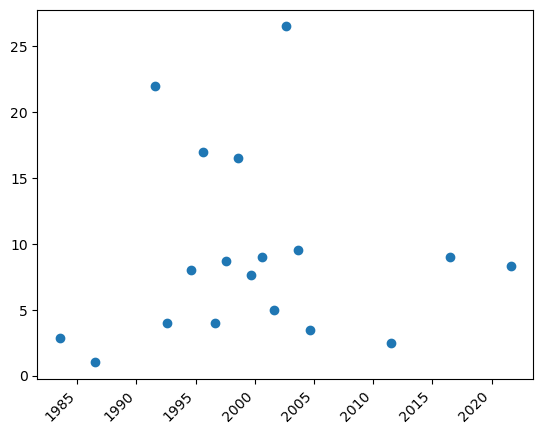

In [11]:
plt.scatter(northern["survey_date"],northern["CPUE"])
plt.xticks(rotation=45, ha="right")
plt.show()